Feature scaling in machine learning is one of the most critical steps during the pre-processing of data before creating a machine learning model. Scaling can make a difference between a weak machine learning model and a better one.

The most common techniques of feature scaling are Normalization and Standardization.

Normalization is used when we want to bound our values between two numbers, typically, between [0,1] or [-1,1]. While Standardization transforms the data to have zero mean and a variance of 1, they make our data unitless. Refer to the below diagram, which shows how data looks after scaling in the X-Y plane.

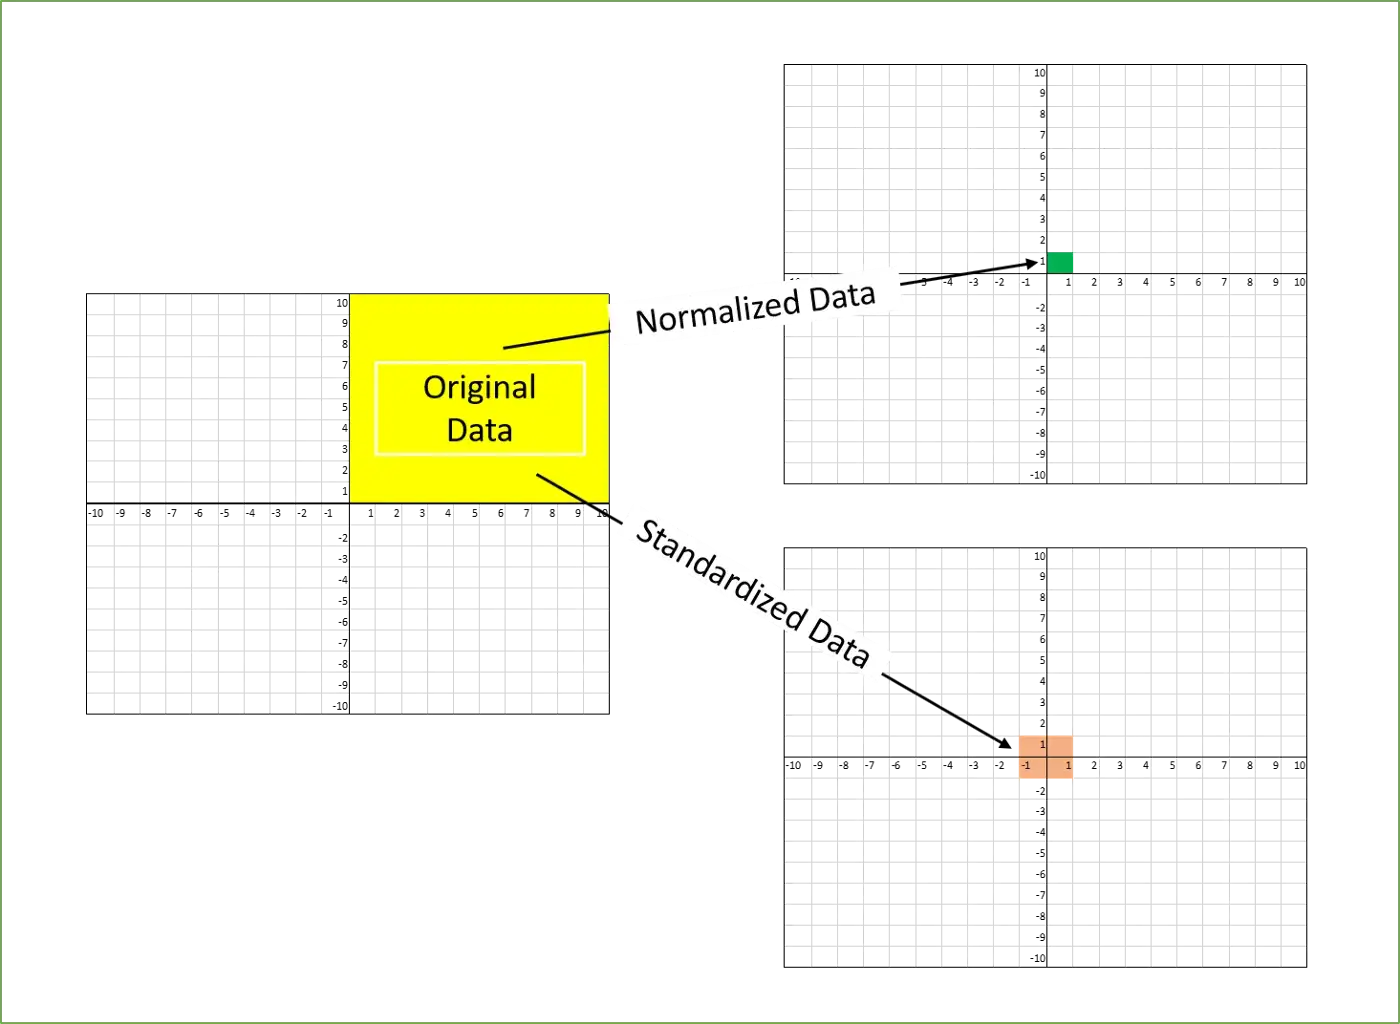



Why do we need scaling?
Machine learning algorithm just sees number — if there is a vast difference in the range say few ranging in thousands and few ranging in the tens, and it makes the underlying assumption that higher ranging numbers have superiority of some sort. So these more significant number starts playing a more decisive role while training the model.

The machine learning algorithm works on numbers and does not know what that number represents. A weight of 10 grams and a price of 10 dollars represents completely two different things — which is a no brainer for humans, but for a model as a feature, it treats both as same.

Suppose we have two features of weight and price, as in the below table. The “Weight” cannot have a meaningful comparison with the “Price.” So the assumption algorithm makes that since “Weight” > “Price,” thus “Weight,” is more important than “Price.”


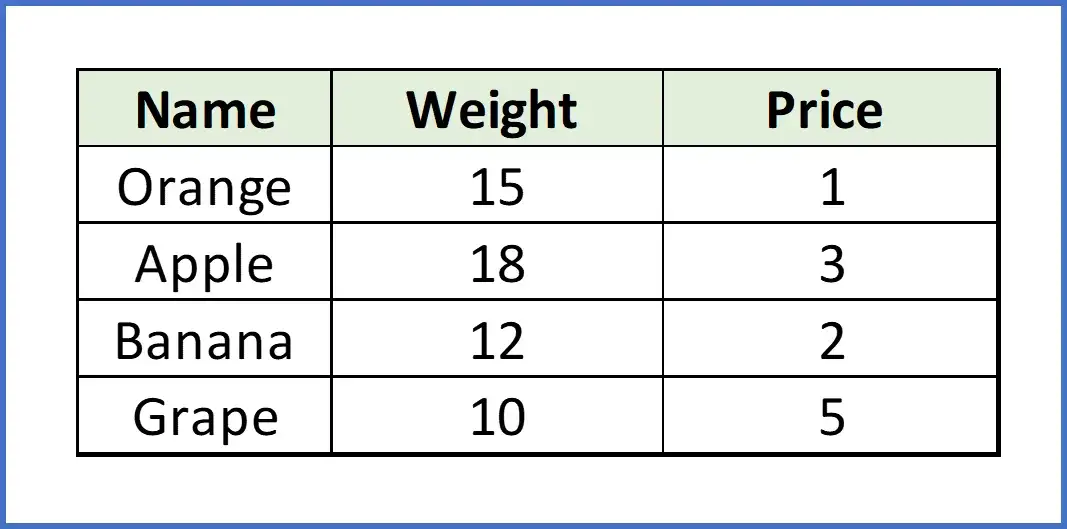

So these more significant number starts playing a more decisive role while training the model. Thus feature scaling is needed to bring every feature in the same footing without any upfront importance. Interestingly, if we convert the weight to “Kg,” then “Price” becomes dominant.

Another reason why feature scaling is applied is that few algorithms like Neural network gradient descent converge much faster with feature scaling than without it

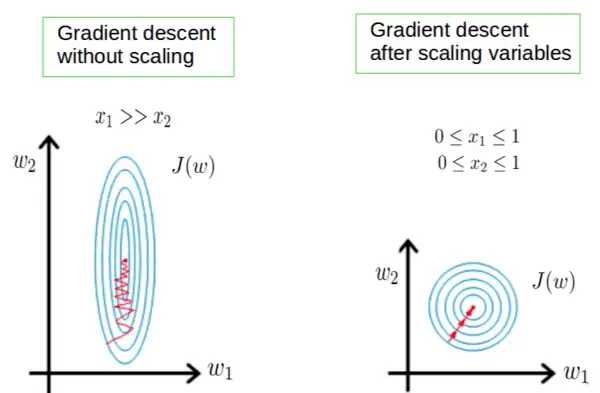

One more reason is saturation, like in the case of sigmoid activation in Neural Network, scaling would help not to saturate too fast.





When to do scaling?
Feature scaling is essential for machine learning algorithms that calculate distances between data. If not scale, the feature with a higher value range starts dominating when calculating distances, as explained intuitively in the “why?” section.

The ML algorithm is sensitive to the “relative scales of features,” which usually happens when it uses the numeric values of the features rather than say their rank.

In many algorithms, when we desire faster convergence, scaling is a MUST like in Neural Network.

Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions do not work correctly without normalization. For example, the majority of classifiers calculate the distance between two points by the distance. If one of the features has a broad range of values, the distance governs this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.

Even when the conditions, as mentioned above, are not satisfied, you may still need to rescale your features if the ML algorithm expects some scale or a saturation phenomenon can happen. Again, a neural network with saturating activation functions (e.g., sigmoid) is a good example.

Rule of thumb we may follow here is an algorithm that computes distance or assumes normality, scales your features.

Algorithms that do not require normalization/scaling are the ones that rely on rules. They would not be affected by any monotonic transformations of the variables. Scaling is a monotonic transformation. Examples of algorithms in this category are all the tree-based algorithms — CART, Random Forests, Gradient Boosted Decision Trees. These algorithms utilize rules (series of inequalities) and do not require normalization.

Algorithms like Linear Discriminant Analysis(LDA), Naive Bayes is by design equipped to handle this and give weights to the features accordingly. Performing features scaling in these algorithms may not have much effect.






How to perform feature scaling?
Below are the few ways we can do feature scaling.

1) Min Max Scaler
2) Standard Scaler
3) Max Abs Scaler
4) Robust Scaler
5) Quantile Transformer Scaler
6) Power Transformer Scaler
7) Unit Vector Scaler



Transform features by scaling each feature to a given range. This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g., between zero and one. This Scaler shrinks the data within the range of -1 to 1 if there are negative values. We can set the range like [0,1] or [0,5] or [-1,1].

This Scaler responds well if the standard deviation is small and when a distribution is not Gaussian. This Scaler is sensitive to outliers.

In [6]:
#Implementation without prepared functions


list_1 = [1, 2, 7, 8, 87, 2, 265, 747]



class Min_Max_scaler:
  def __init__(self, List):
    self.List = List
  
  def fit(self):
    temp = []
    for element in self.List:
      temp.append((element - min(self.List)) / (max(self.List) - min(self.List)))
    
    return temp


norm = Min_Max_scaler(list_1)

print(norm.fit())

[0.0, 0.0013404825737265416, 0.00804289544235925, 0.00938337801608579, 0.11528150134048257, 0.0013404825737265416, 0.353887399463807, 1.0]


In [10]:
#Implementation with ready functions
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler = MinMaxScaler()

scaler.fit_transform(np.array(list_1).reshape(-1, 1))

array([[0.        ],
       [0.00134048],
       [0.0080429 ],
       [0.00938338],
       [0.1152815 ],
       [0.00134048],
       [0.3538874 ],
       [1.        ]])